#**🔍Preliminary Task**

# **1. ⚙️Data Description and Pre-Processing**



# **Loading Dataset and importing Libraries**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#In order to do all task we have to import all libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Using the Path creating the dataframe=df
path="/content/drive/MyDrive/adverts (1).csv"
df=pd.read_csv(path)

# **1.Data Understanding and Exploration**

**1.1 Understanding of the key features**

In [ ]:
df.head()


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
#This gives the discriptive stats of the dataset
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


Conclusion
1. The descriptive stats showing alot of insights as we can see that
2. the Mileage has MIN=0 & MAX=999999
3. The Price has MIN=0 & MAX=99999999
4. The year_of_registration has MIN=1000 & MAX=2016

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB



*   The count of object type variable is 7

*   THe data contains the 402005 rows




In [ ]:
# Get column names and their count
column_names = df.columns.tolist()
column_count = len(column_names)

# Output the results
print("Column Names:", column_names)
print("Total Number of Columns:", column_count)

Column Names: ['public_reference', 'mileage', 'reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'year_of_registration', 'price', 'body_type', 'crossover_car_and_van', 'fuel_type']
Total Number of Columns: 12


In [ ]:
df.shape

(402005, 12)



*   there are Coloumn=12
*   there are Rows=402005



In [ ]:
df.duplicated().sum()

np.int64(0)

The above code gives the count of the duplicate values
athe reason for doing it because the duplicate values does effect our model
and it does effect on our insights changing std and others pd.value_counts.

In [ ]:
missing_count = df.isnull().sum()

missing_percentage = (missing_count / len(df)) * 100

print("Count of Missing Values:")
print(missing_count)
print("\nPercentage of Missing Values:")
print(missing_percentage)

Count of Missing Values:
public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

Percentage of Missing Values:
public_reference         0.000000
mileage                  0.031592
reg_code                 7.924528
standard_colour          1.337794
standard_make            0.000000
standard_model           0.000000
vehicle_condition        0.000000
year_of_registration     8.286215
price                    0.000000
body_type                0.208206
crossover_car_and_van    0.000000
fuel_type                0.149501
dtype: float64




*   The above code shows the percentage of the nulll values in each coloumn



*   While the values like REG_CODE, STANDARD_COLOUR and year_of_registration
are greater in percentage and should be taken care of.

*   The values with less than the 1 or we can say are 0 will be ignored



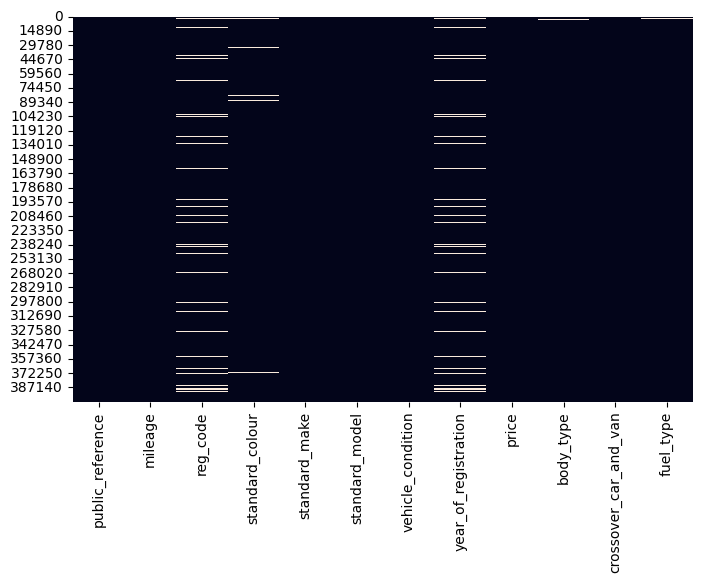

In [ ]:
# Visualize the missing data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

THe above plot shows the visual way of showing the missing values in the dataset.

# **1.2 Feature Distribution Analysis**

The histogram plot of each attribute will be plotted below.

#(a)Bar plot for the frequency of 'Standar_Color

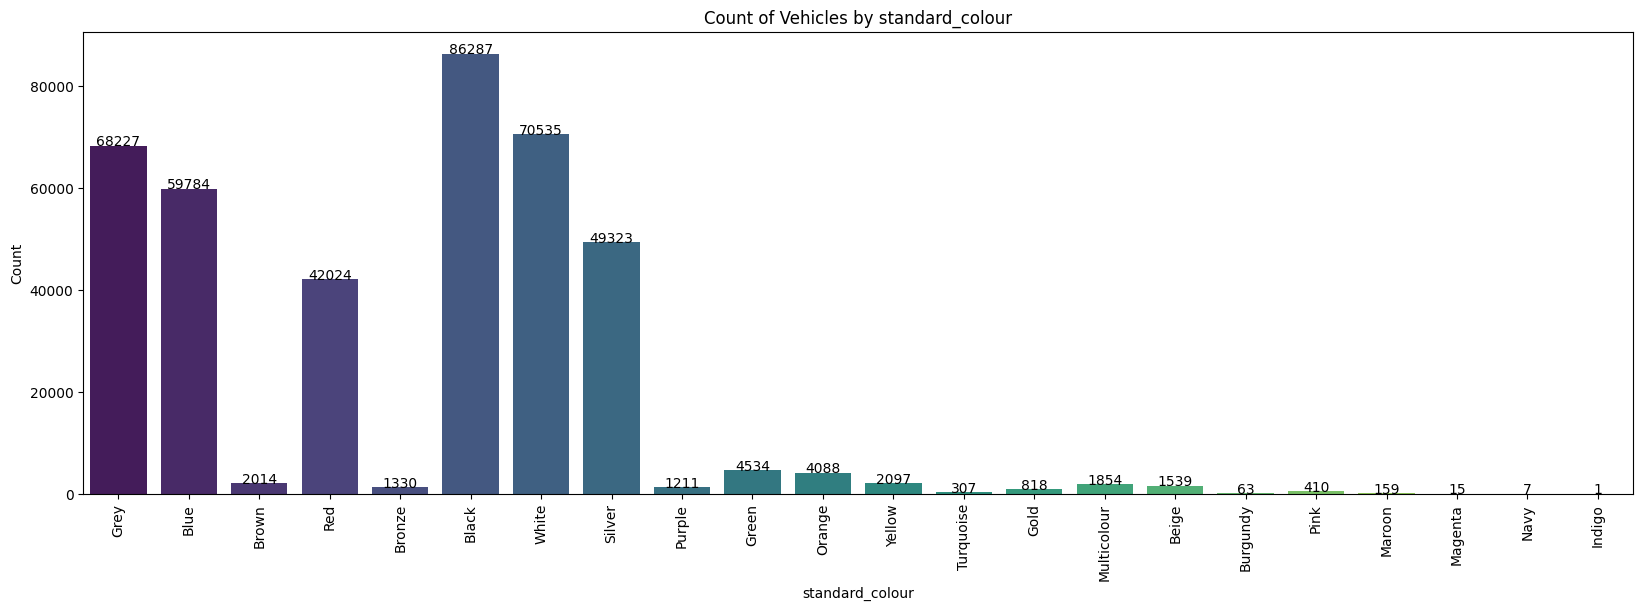

In [ ]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='standard_colour', data=df,hue='standard_colour',legend=False,  palette='viridis')
plt.xticks(rotation=90)

# Adding count annotations
for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of the bar (count value)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
            str(count), ha='center', fontsize=10)

# Set plot labels and title
plt.title('Count of Vehicles by standard_colour')
plt.xlabel('standard_colour')
plt.ylabel('Count')
plt.show()

#(b)Histogram of the Mileage

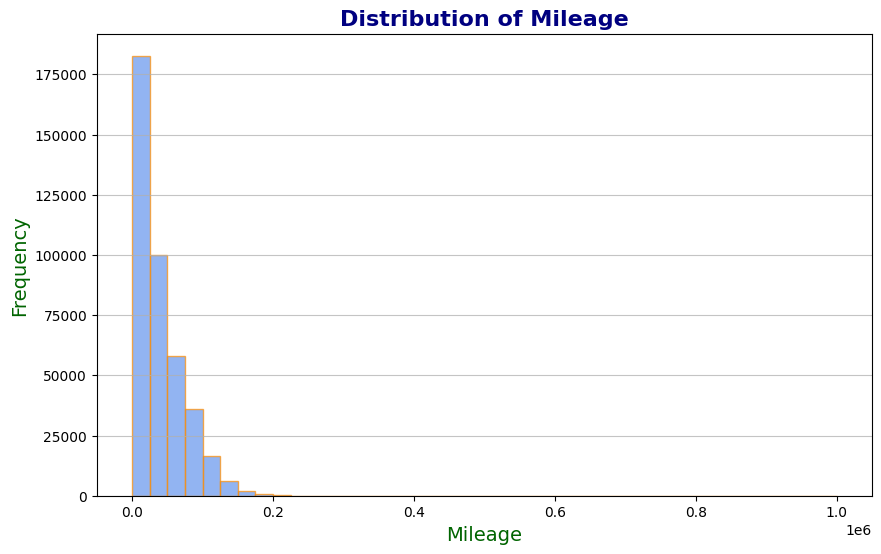

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['mileage'], bins=40, color='cornflowerblue', edgecolor='darkorange', alpha=0.7)

plt.title("Distribution of Mileage", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Mileage", fontsize=14, color='darkgreen')
plt.ylabel("Frequency", fontsize=14, color='darkgreen')
plt.grid(axis='y', alpha=0.75)
plt.show()


*   The mileage distribution is right skewed.
*   The distributionis right skewed because if the outliers like high mileage cars that shifted the skewness of the plot.

# (c)Histogram for the Price feature

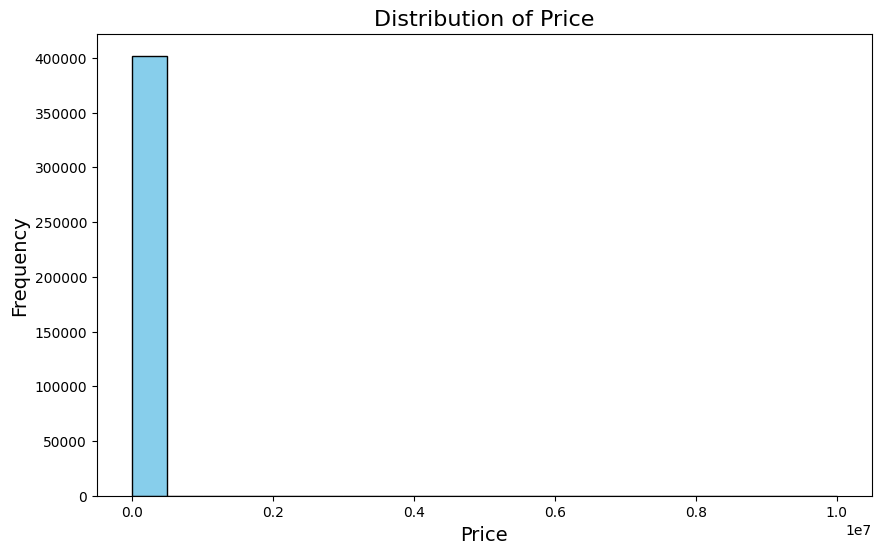

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Price", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()



*   the single straight line in the distribution shows that the data is only distributed around 0 to 0.1 e7
*   the values other than that are all outliers/noise which needs to be dealt



#(d). Year of registration Distribution

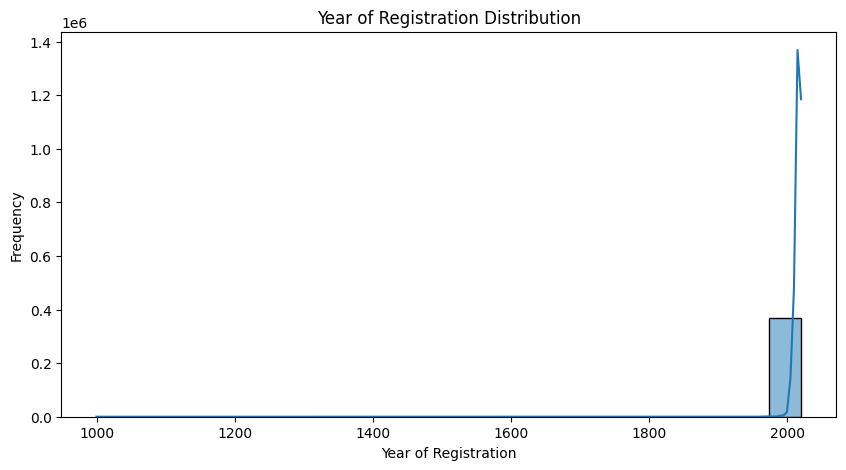

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['year_of_registration'], bins=22, kde=True)
plt.title('Year of Registration Distribution')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.show()




*   The first car to be registered was in 1904 so other than that are the outleirs/noise which should be removed
*   The data is mostly distibuted around 2000 which can be seen in a graph.



#(e). The distribution of the fuel type

<ipython-input-16-6d017f4d2d8a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='fuel_type', data=df, palette='viridis')


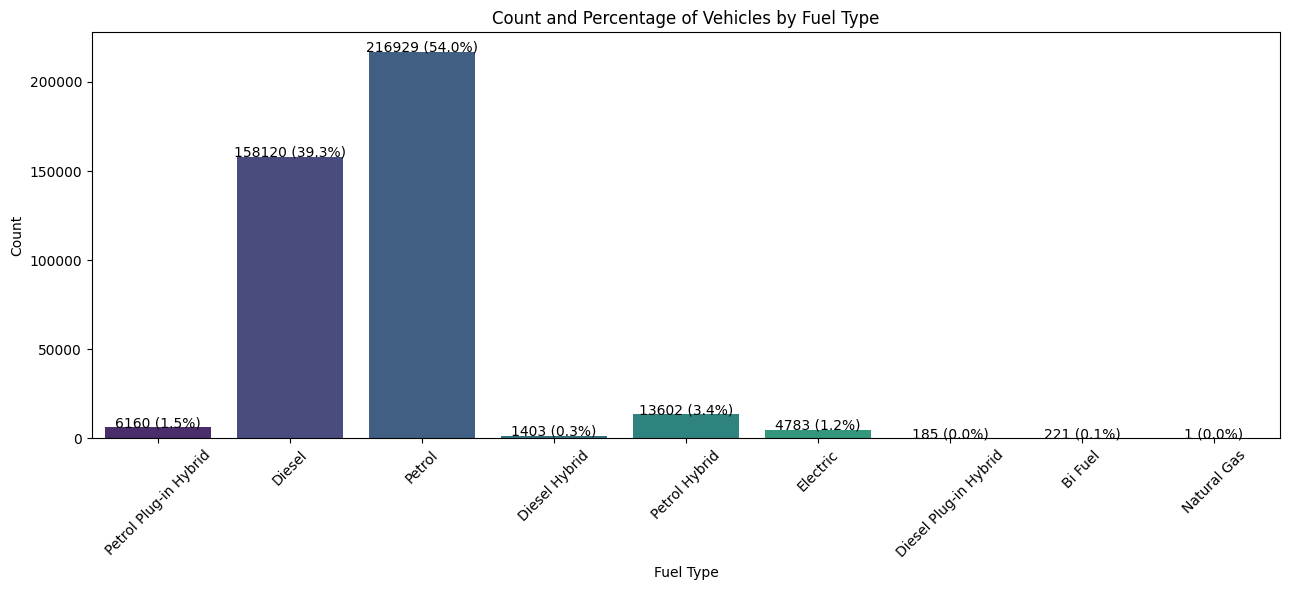

In [ ]:
fuel_counts = df['fuel_type'].value_counts()
total_count = len(df)

plt.figure(figsize=(13, 6))
ax = sns.countplot(x='fuel_type', data=df, palette='viridis')

for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of the bar (count value)
    percentage = (count / total_count) * 100  # Calculate percentage
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
            f'{count} ({percentage:.1f}%)', ha='center', fontsize=10)

plt.title('Count and Percentage of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#(f). The distribution of the Vehicle Condition

<ipython-input-17-96f16dcf1781>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='vehicle_condition', data=df, palette='viridis')


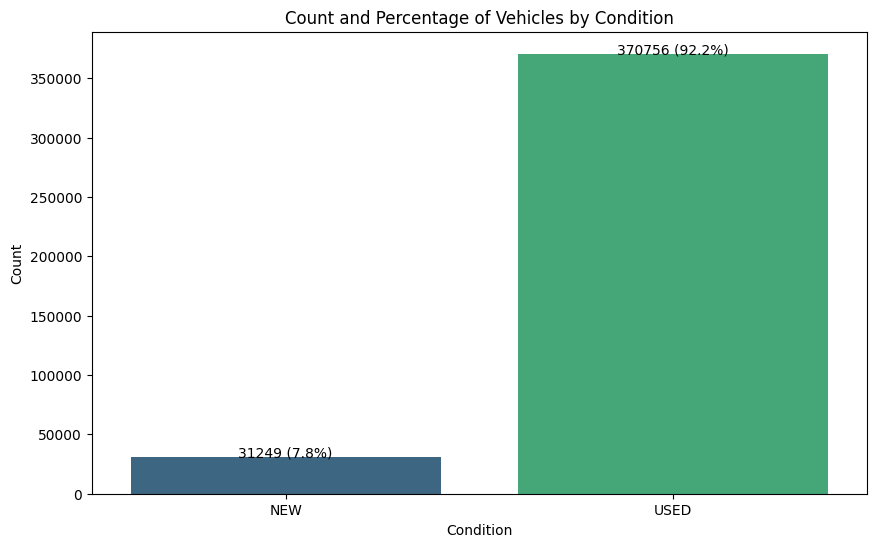

In [ ]:
condition_counts = df['vehicle_condition'].value_counts()
total_count = len(df)
condition_percentages = (condition_counts / total_count) * 100

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='vehicle_condition', data=df, palette='viridis')

for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of the bar (count value)
    percentage = (count / total_count) * 100  # Calculate percentage
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
            f'{count} ({percentage:.1f}%)', ha='center', fontsize=10)

plt.title('Count and Percentage of Vehicles by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

#(g). The distribution of the standard_model

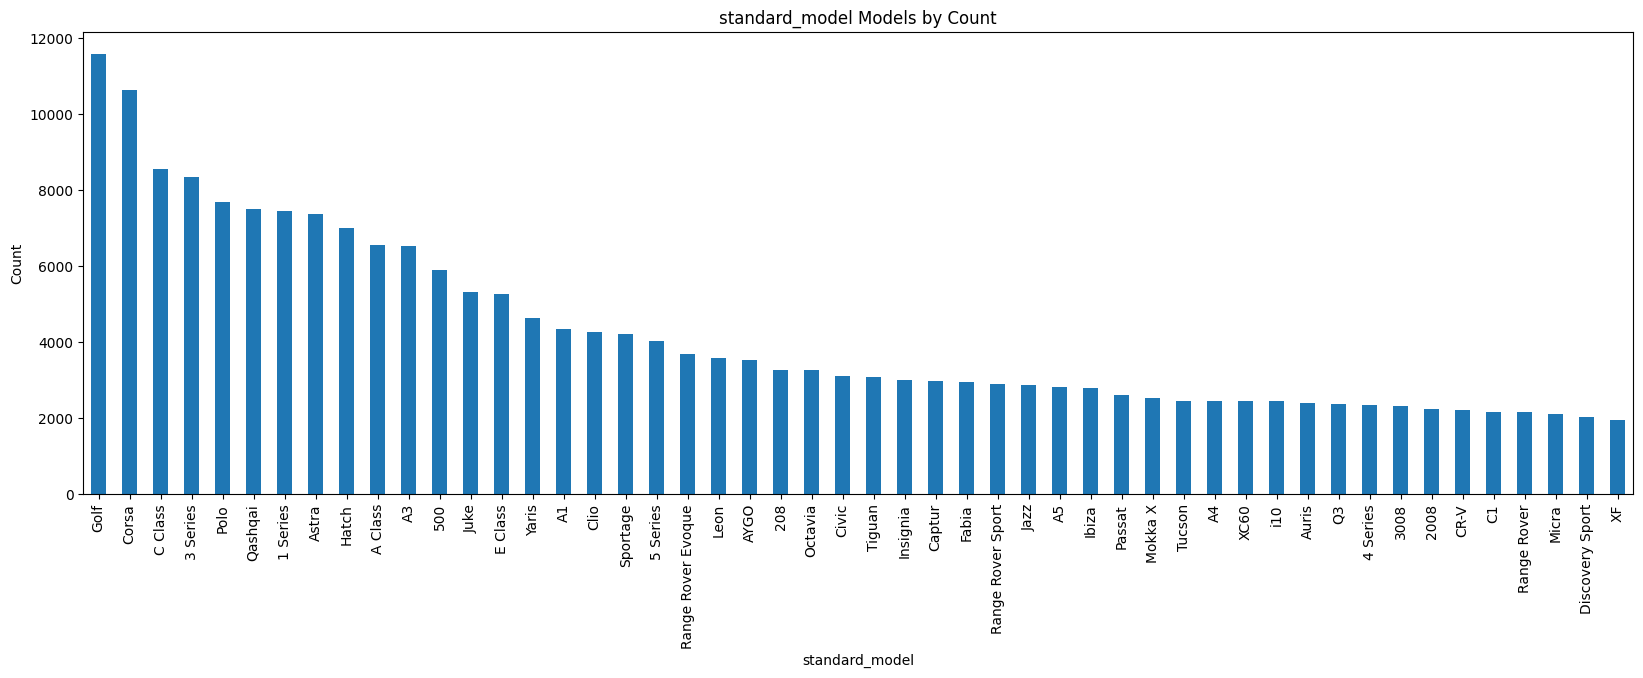

In [ ]:
df['standard_model'].value_counts().head(50).plot(kind='bar', figsize=(20, 6))
plt.title('standard_model Models by Count')
plt.xlabel('standard_model')
plt.ylabel('Count')
plt.show()

#(h). The distribution of the standard_make

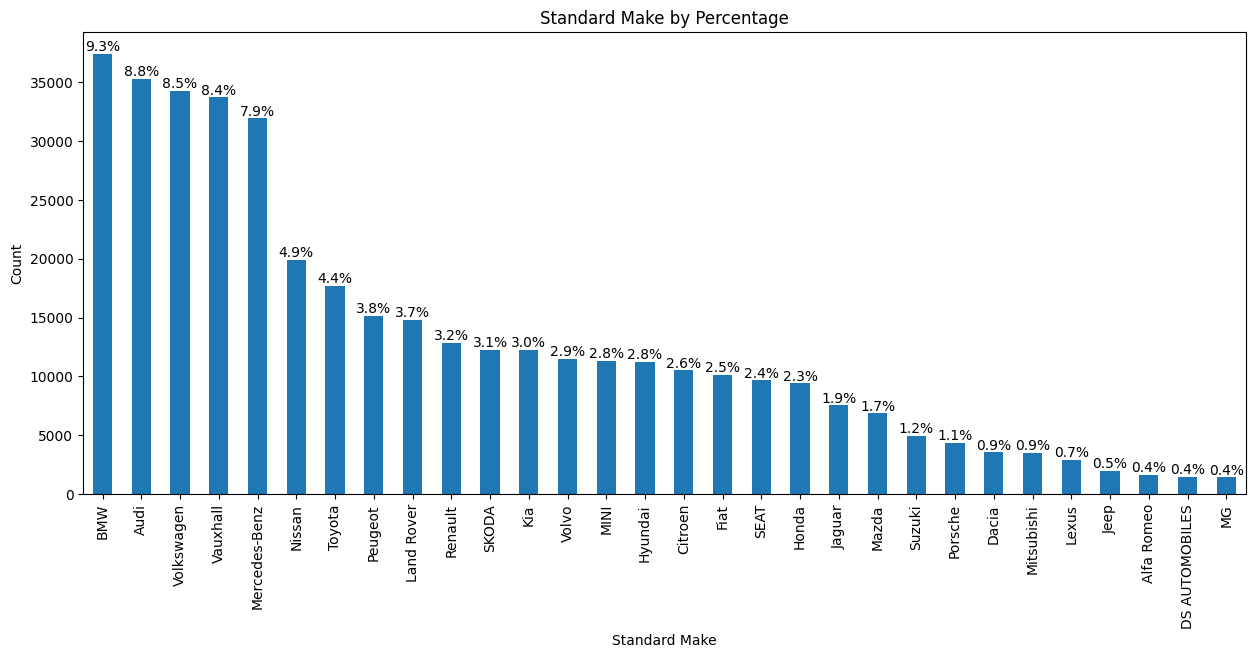

In [ ]:
make_counts = df['standard_make'].value_counts()
total_count = make_counts.sum()
make_percentages = (make_counts / total_count) * 100

ax = make_counts.head(30).plot(kind='bar', figsize=(15, 6))
plt.title('Standard Make by Percentage')
plt.xlabel('Standard Make')
plt.ylabel('Count')

for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100  # Calculate percentage
    ax.annotate(
        f'{percentage:.1f}%',  # Display percentage
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of text
        ha='center', va='bottom', fontsize=10  # Align text and font size
    )

plt.show()

#(I). The distribution of body_type

<ipython-input-20-d6c15e3a4e7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='body_type', data=df, palette='viridis')


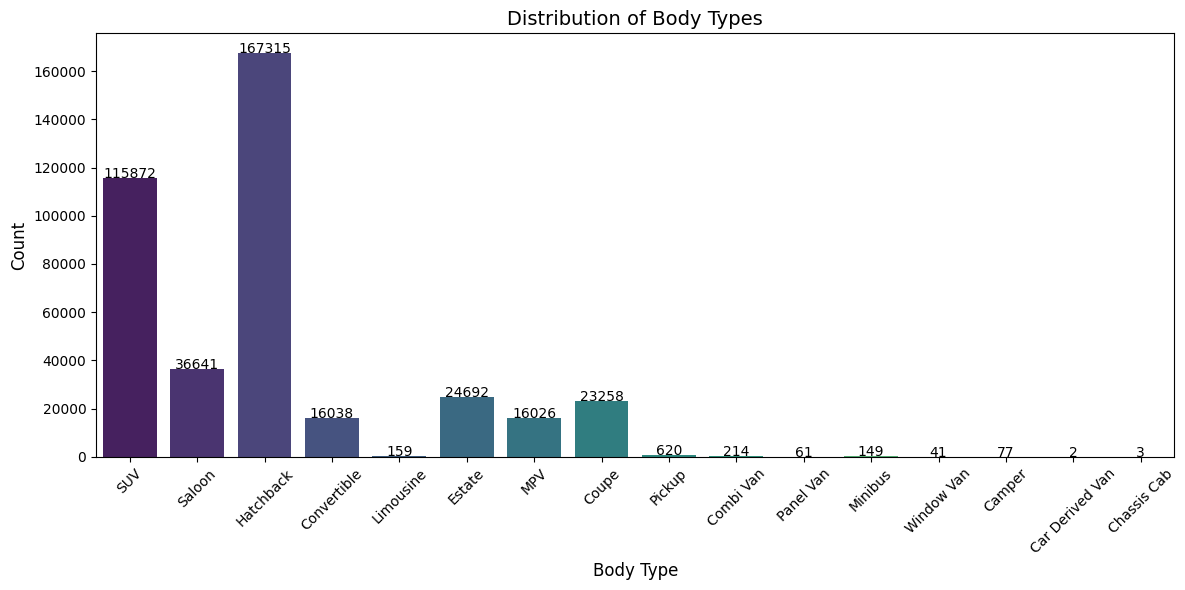

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='body_type', data=df, palette='viridis')
for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of each bar (count)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
            str(count), ha='center', fontsize=10)

plt.title('Distribution of Body Types', fontsize=14)
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# **2. Data Preprocessing**

## **2.1 Data Cleaning**

#As year of registration is important for our dataset so we need to remove the missing values from it.

## The number of missing values in each category can be seen by this code.

In [ ]:
missing_count = df.isnull().sum()

missing_percentage = (missing_count / len(df)) * 100

print("Count of Missing Values:")
print(missing_count)
print("\nPercentage of Missing Values:")
print(missing_percentage)

Count of Missing Values:
public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

Percentage of Missing Values:
public_reference         0.000000
mileage                  0.031592
reg_code                 7.924528
standard_colour          1.337794
standard_make            0.000000
standard_model           0.000000
vehicle_condition        0.000000
year_of_registration     8.286215
price                    0.000000
body_type                0.208206
crossover_car_and_van    0.000000
fuel_type                0.149501
dtype: float64


#Targeting the Year of registration and reg code.

In [ ]:
# Filter rows where 'year_of_registration' is NaN
nan_values = df[df['year_of_registration'].isnull()]

# Print rows with NaN values in 'year_of_registration'
print("Rows with NaN in 'year_of_registration':")
print(nan_values)

Rows with NaN in 'year_of_registration':
        public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             NaN        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
37       202001306737473      0.0      NaN           White          Fiat   
44       202003178531910      0.0      NaN             NaN         Honda   
...                  ...      ...      ...             ...           ...   
401860   202010024501227     10.0      NaN          Silver    Mitsubishi   
401890   202010104843364      5.0      NaN             Red           BMW   
401902   202010134960554     10.0      NaN           White           BMW   
401905   202010144983518      0.0      NaN             Red    Land Rover   
401971   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition  

## **Conclusion**:As we can see that the most of the data where year of registration is null is for new cars . In order to check it lets see weather it is true or not

# Now Checking if all these rows have 'New' in 'vehicle_condition'

In [ ]:
all_new_condition = (nan_values['vehicle_condition'] == 'New').all()
if all_new_condition:
    print("All NaN values in 'year_of_registration' correspond to 'New' in 'vehicle_condition'.")
else:
    print("Not all NaN values in 'year_of_registration' correspond to 'New' in 'vehicle_condition'.")

Not all NaN values in 'year_of_registration' correspond to 'New' in 'vehicle_condition'.


##**Conclusion:** The output is "Not all NaN values in 'year_of_registration' correspond to 'New' in 'vehicle_condition'."

#Now we are going to check the null values which are not for the new cars for year of registration.

In [ ]:
df['vehicle_condition'] = df['vehicle_condition'].str.strip().str.lower()

# Filter rows where 'year_of_registration' is NaN but 'vehicle_condition' is NOT 'new'
non_new_condition_rows = df[(df['year_of_registration'].isnull()) & (df['vehicle_condition'] != 'new')]

# Count the rows
non_new_condition_count = len(non_new_condition_rows)

print(f"Count of rows with NaN 'year_of_registration' and 'vehicle_condition' not equal to 'New': {non_new_condition_count}")
print("Rows that meet this condition:")
print(non_new_condition_rows)

Count of rows with NaN 'year_of_registration' and 'vehicle_condition' not equal to 'New': 2062
Rows that meet this condition:
        public_reference  mileage reg_code standard_colour standard_make  \
54       202007030806426  30000.0       18             Red      Vauxhall   
83       202008222801747  42847.0       61             Red         Honda   
865      202010084741550  43130.0       66           White    Land Rover   
968      202010305607535  63369.0       17            Blue         SKODA   
1256     202010225294466  18715.0       68           White         Volvo   
...                  ...      ...      ...             ...           ...   
400536   202010094805399  40523.0      NaN             Red       Peugeot   
400725   202008252905656     45.0       20          Silver    Land Rover   
401314   202010315635541  12522.0       67             Red         Dacia   
401323   201909222504136  46000.0       13            Grey    Volkswagen   
401357   202007111114611     10.0     

##**Conclusion**:There are 2062 vehicles that are 'used' and still the nan value is is in vehicle registration year.

##Now as we know the amount of new cars having null values and the used ones as we can see that the used ones have reg code filled but the year of registration is null Only
Checking  rows where:
1. 'year_of_registration' is NaN
2. 'vehicle_condition' is 'Used'
3. 'reg_code' is also NaN

In [ ]:
null_year_used_condition_rows = df[
    (df['year_of_registration'].isnull()) &
    (df['vehicle_condition'].str.strip().str.lower() == 'used') &
    (df['reg_code'].isnull())
]

# Count the rows
null_year_used_condition_count = len(null_year_used_condition_rows)

print(f"Count of rows with null 'year_of_registration', 'Used' condition, and null 'reg_code': {null_year_used_condition_count}")
print("Rows that meet these conditions:")
print(null_year_used_condition_rows)

Count of rows with null 'year_of_registration', 'Used' condition, and null 'reg_code': 321
Rows that meet these conditions:
        public_reference  mileage reg_code standard_colour standard_make  \
1510     202010054642656  13406.0      NaN           White    Land Rover   
2631     202010235350805   1000.0      NaN            Blue      Maserati   
4766     202003238706011      NaN      NaN            Grey        Subaru   
6998     202010225284269    160.0      NaN            Grey       McLaren   
7517     202009234093511  11413.0      NaN             NaN          MINI   
...                  ...      ...      ...             ...           ...   
392499   202010064681927  83555.0      NaN           Black    Land Rover   
392730   202009093528195  38796.0      NaN            Grey         Rover   
396985   202001256559400  29000.0      NaN           Black   Lamborghini   
399728   202008262969804  12812.0      NaN          Silver   Rolls-Royce   
400536   202010094805399  40523.0      N

##**Conclusion**:There are 321 rows where registration code, year of registration is null too and vehicle type is used

# **Approach to fill the missing values in year of registration**
1. The values like above 321 rows will be removed as they dont have significance effect and cannot be filled as they have both year of registration and registration code having null value
2. The vehicle type which are new and there registration code is null will be imputed robustly with fixed code
3. The vehicle which are used and have not any year of registration wil be imputed usnig the imputing techniques and the variable will be reg code for them.

In [ ]:
df = df.drop(null_year_used_condition_rows.index)

 The above code Removes the rows that match the criteria where:
1. 'year_of_registration' is NaN
2. 'vehicle_condition' is 'Used'
3. 'reg_code' is also NaN
Remove the identified rows from the DataFrame

## The cars which are new and have null values in year of registration and there reg code is there too so the last new car is 2020 and assuming that we can replace the new cars with 2021 using the below code.

In [ ]:
ddf= df.loc[
    (df['year_of_registration'].isnull()) &
    (df['vehicle_condition'].str.strip().str.lower() == 'new'),
    'year_of_registration'
] = 2021



*   Replace NaN in 'year_of_registration' with 2021 where 'vehicle_condition' is 'New'

*   The above code replaces the year of registration for the cars that have null value in registration and Null value in registration code



#Now checking again the null values


In [ ]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,31536
standard_colour,5352
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,1741
price,0
body_type,778


*   Now it is 1741
*   At first it was 33311



## Now dealing with these 1741 missing values.
## First checking the null values are for used condition cars ?

In [ ]:
df['vehicle_condition'] = df['vehicle_condition'].str.strip().str.lower()

# Filter rows where 'year_of_registration' is NaN but 'vehicle_condition' is NOT 'new'
non_new_condition_rows = df[(df['year_of_registration'].isnull()) & (df['vehicle_condition'] != 'new')]

non_new_condition_count_1 = len(non_new_condition_rows)
print(f"Count of rows with NaN 'year_of_registration' and 'vehicle_condition' not equal to 'New': {non_new_condition_count}")
print("Rows that meet this condition:")
print(non_new_condition_rows)

Count of rows with NaN 'year_of_registration' and 'vehicle_condition' not equal to 'New': 2062
Rows that meet this condition:
        public_reference  mileage reg_code standard_colour standard_make  \
54       202007030806426  30000.0       18             Red      Vauxhall   
83       202008222801747  42847.0       61             Red         Honda   
865      202010084741550  43130.0       66           White    Land Rover   
968      202010305607535  63369.0       17            Blue         SKODA   
1256     202010225294466  18715.0       68           White         Volvo   
...                  ...      ...      ...             ...           ...   
400336   202010315635977  66287.0       63            Blue      Vauxhall   
400725   202008252905656     45.0       20          Silver    Land Rover   
401314   202010315635541  12522.0       67             Red         Dacia   
401323   201909222504136  46000.0       13            Grey    Volkswagen   
401357   202007111114611     10.0     

##**Conclusion**: There are 1741 vehicles that are used and still the nan value is in vehicle registration year.

## Now using the reg code to fill the yeaer of registration because the used cars having reegcode is showing the null values of 1741. which can be imputed using this logical thinking.

In [ ]:
# Define a function to compute the year of registration based on reg_code
def compute_year_from_reg_code(reg_code):
    if pd.isnull(reg_code):
        return np.nan
    try:
        # Extract the year identifier
        year_identifier = int(reg_code)

        # Apply the logic based on year identifier
        if year_identifier > 20:  # Greater than 20
            return 2000 + (50 - year_identifier)
        else:  # Less than or equal to 20
            return 2000 + year_identifier
    except (ValueError, IndexError):
        return np.nan  # Handle invalid formats

# Iterate over the DataFrame to fill missing year_of_registration values
for index in df.index:
    if pd.isnull(df.at[index, 'year_of_registration']):
        # Compute the year from reg_code
        df.at[index, 'year_of_registration'] = compute_year_from_reg_code(df.at[index, 'reg_code'])

# Optionally, print rows with missing values if any remain
missing_years = df[df['year_of_registration'].isnull()]
if not missing_years.empty:
    print("\nRows still with missing values in 'year_of_registration':")
    print(missing_years)


Rows still with missing values in 'year_of_registration':
        public_reference   mileage reg_code standard_colour  standard_make  \
10044    202003098187902   73330.0        B            Gold         Jaguar   
16619    202010165086036   34000.0        P          Orange     Volkswagen   
28307    202003218665171   55400.0        E           White        Renault   
31566    202007040862151   26200.0        R             NaN        Ferrari   
50188    202009304378374   24500.0        R            Blue          Mazda   
50961    202010215260465   49000.0        L            Blue      Chevrolet   
78714    201912165366581   79800.0        E           Green   Aston Martin   
80899    202010014455127    2000.0       CA           Green       Caterham   
85202    202009234126186   99123.0        B           Green     Land Rover   
95640    202010215267071   55389.0        E            Grey  Mercedes-Benz   
105172   201905077698508   43098.0        C             Red        Bentley   
12135

*   As the UK registration code wikipedia works shows that the registration code is 63 meaning that the car is registered at late month and the year of registration will be so 50+13 meaning that the car is registerd at 2013. Using this logic the below program will fill the missing values.

*   The logic is that the cars with reg code of 20 means the year of registration code of the car is 2020.


*   Now using the reg code we will fill the fissing values
*   THe end of the code will also print the remaining the missing values

*   ### **Citation**: Wikipedia contributors. (n.d.). Vehicle registration plates of the United Kingdom. Wikipedia. Retrieved December 25, 2024, from https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom





### Now Filling the missing values in yar of registration where reg code is alphabetics.

In [ ]:

def fill_year(row, numeric_start_year=2000, letter_mappings=None):
    """
    Fills missing 'year_of_registration' values based on 'reg_code'.

    Args:
        row (Series): A row of the DataFrame.
        numeric_start_year (int): Base year for numeric codes.
        letter_mappings (dict): Dictionary mapping letters to years.

    Returns:
        int: The filled or existing 'year_of_registration'.
    """
    if pd.isnull(row['year_of_registration']):
        reg_code = row['reg_code']
        # Handle numeric reg_code
        if isinstance(reg_code, int):
            if reg_code <= 20:
                return numeric_start_year + reg_code
            else:
                return numeric_start_year + (reg_code - 50)
        # Handle letter-based reg_code
        elif isinstance(reg_code, str) and letter_mappings:
            return letter_mappings.get(reg_code.upper(), row['year_of_registration'])
    return row['year_of_registration']

# Define default letter mappings
default_letter_mappings = {
    'A': 1983, 'B': 1984, 'C': 1985, 'D': 1986,
    'E': 1987, 'F': 1988, 'G': 1989, 'H': 1990,
    'J': 1991, 'K': 1992, 'L': 1993, 'M': 1994,
    'N': 1995, 'P': 1996, 'R': 1997, 'S': 1998,
    'T': 1999, 'V': 2000
}

# Apply the function to update the DataFrame
df['year_of_registration'] = df.apply(
    fill_year,
    axis=1,
    numeric_start_year=2000,
    letter_mappings=default_letter_mappings
)

### The above code fill the null values of year of registration with reg code if its reg code is less than equal to 20 than add it in 2000 and it its >20 than subtract reg code from 50 and add it in 2000.
### If the reg code is giving the
### A: 1983 B: 1984 C: 1985 D: 1986 E: 1987 F: 1988 G: 1989 H: 1990 J: 1991
### K: 1992 L: 1993 M: 1994 N: 1995 P: 1996 R: 1997 S: 1998 T: 1999 V: 2000
### Prefix for cars less 2000 than use the letters mentioned above.


*   ### **Citation**:The prefix system was introduced on August 1, 1983, with the letter 'A' and continued until 'Y', which was used until August 2001. The letters I, O, U, Q, and Z were excluded from the system due to potential confusion with numbers or other administrative reasons



### Now Checking again the null values in the year of registration.

In [ ]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,31536
standard_colour,5352
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,4
price,0
body_type,778


### Now replacing the **null values** in the **standard colour** using the the most frequent colours randomly.

In [ ]:
#Replacing the null values in the standard colour with the most frequent colours randomly

# Step 1: Convert the column to string type (to handle potential type issues)
df['standard_colour'] = df['standard_colour'].astype('str').replace('None', np.nan)

# Step 2: Identify the top 6 most frequent colors (ignoring NaN values)
top_colors = df['standard_colour'].dropna().value_counts().nlargest(6).index.tolist()

# Step 3: Replace null (NaN) values with random choices from the top colors
def fill_null_with_random_top_colors(value):
    if pd.isna(value):  # Check if value is NaN
        return np.random.choice(top_colors)
    return value

df['standard_colour'] = df['standard_colour'].apply(fill_null_with_random_top_colors)
print("Updated DataFrame after imputing missing values:")
print(df)

Updated DataFrame after imputing missing values:
        public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0      NaN            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

           standard_model 

In [ ]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,31536
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,4
price,0
body_type,778


## Now focusing on the null values in the **reg code**

In [ ]:
null_reg_code_rows = df[df['reg_code'].isnull()]
print("Rows with null values in 'reg_code':")
print(null_reg_code_rows)


Rows with null values in 'reg_code':
        public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             nan        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
37       202001306737473      0.0      NaN           White          Fiat   
44       202003178531910      0.0      NaN             nan         Honda   
...                  ...      ...      ...             ...           ...   
401860   202010024501227     10.0      NaN          Silver    Mitsubishi   
401890   202010104843364      5.0      NaN             Red           BMW   
401902   202010134960554     10.0      NaN           White           BMW   
401905   202010144983518      0.0      NaN             Red    Land Rover   
401971   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition  year

#### 1. Now we want to check weather all the values in reg belongs to new cars only ?
#### 1a. Checking if all null 'reg_code' rows have 'vehicle_condition' as 'new'

In [ ]:
all_new_condition = null_reg_code_rows['vehicle_condition'].str.strip().str.lower().eq('new').all()

if all_new_condition:
    print("All rows with null 'reg_code' have 'vehicle_condition' as 'new'.")
else:
    print("Some rows with null 'reg_code' do not have 'vehicle_condition' as 'new'.")

# Filter for rows with null 'reg_code' and 'vehicle_condition' not equal to 'new'
non_new_condition_rows = null_reg_code_rows[null_reg_code_rows['vehicle_condition'].str.strip().str.lower() != 'new']

# Print the rows where vehicle_condition is not 'new'
print("Rows with null 'reg_code' and 'vehicle_condition' not 'new':")
print(non_new_condition_rows)

Some rows with null 'reg_code' do not have 'vehicle_condition' as 'new'.
Rows with null 'reg_code' and 'vehicle_condition' not 'new':
        public_reference   mileage reg_code standard_colour  standard_make  \
630      202010275479166   54000.0      NaN           White         Toyota   
682      202006019703585  103450.0      NaN          Bronze            BMW   
1131     202009274274693   74000.0      NaN          Silver  Mercedes-Benz   
1194     202010114878094   13000.0      NaN           White        Ferrari   
1335     202004018824812   76000.0      NaN           White   Aston Martin   
...                  ...       ...      ...             ...            ...   
397560   202010165092978   72000.0      NaN            Blue         Toyota   
397689   202007171374769   67080.0      NaN            Grey            BMW   
397788   202009214000713  119400.0      NaN           White         Toyota   
397947   202010265437718  147898.0      NaN            Blue         Toyota   
398865  

### As we have analyze the data.Now imputing the missing values in the saem way we imputed in the year of registration with same logic.
### Which was if the year of registration is 2021 the reg code will be 21 but this will be only applied for the eyar 2001 to 2021 and for the year below 2001 the prefixes method will be applied.

In [ ]:
def fill_reg_code(row):
    year = row['year_of_registration']
    if pd.isnull(row['reg_code']):
        if 2000 <= year <= 2021:
            return str(year)[-2:]  # Use the last two digits of the year
        elif year < 2000:
            prefix_map = {
                1983: 'A', 1984: 'B', 1985: 'C', 1986: 'D',
                1987: 'E', 1988: 'F', 1989: 'G', 1990: 'H',
                1991: 'J', 1992: 'K', 1993: 'L', 1994: 'M',
                1995: 'N', 1996: 'P', 1997: 'R', 1998: 'S',
                1999: 'T', 2000: 'V'
            }
            return prefix_map.get(year, None)  # Return the prefix or None if not found
    return row['reg_code']  # If reg_code is not null, return it as is

# Apply the function to fill null values in reg_code
df['reg_code'] = df.apply(fill_reg_code, axis=1)

# Print the updated DataFrame
print("Updated DataFrame:")
print(df)

Updated DataFrame:
        public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0       .0            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

           standard_model vehicle_condition  year_of_reg

In [ ]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,46
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,4
price,0
body_type,778


### As we can see that all the null values in the reg code is removed from **31536** to **46**.

#**2.2 Feature engineeering**

### Example 1:**Mileage_category**
### Using the feature mileage we can divide the mileage into 3 categories.


1.   low(mileage>60000)

1.   medium(60000< mileage >80000)
2.   high(mileage>80000)
###**Citation** : Trimble Maps. (n.d.). Mileage report. Retrieved December 26, 2024, from https://developer.trimblemaps.com/restful-apis/routing/route-reports/mileage/

In [ ]:
# Categorization
def categorize_mileage(mileage):
    if mileage <= 60000:
        return 'Low'
    elif mileage <= 80000:
        return 'Medium'
    else:
        return 'High'

df['Mileage_Category'] = df['mileage'].apply(categorize_mileage)
print(df)

sample_size = 1000
m_category_sample = df.sample(n=sample_size, random_state=42)

        public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0       .0            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

           standard_model vehicle_condition  year_of_registration  price  \

In [ ]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,Mileage_Category
0,202006039777689,0.0,.0,Grey,Volvo,XC90,new,2021.0,73970,SUV,False,Petrol Plug-in Hybrid,Low
1,202007020778260,108230.0,61,Blue,Jaguar,XF,used,2011.0,7000,Saloon,False,Diesel,High
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,used,2017.0,14000,SUV,False,Petrol,Low
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,used,2016.0,7995,Hatchback,False,Diesel,Low
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,used,2015.0,26995,SUV,False,Diesel,Medium


## Example 2: **Age_of_Car**


1.   Assuming the new year to be 2021
2.   So the car age will be the age subtracted from the year of registration and 2021 .

1.   The age of car feature is very important in predicting model and will be same for both machine learning and principal of adata science Assignment.
2.   List item





In [ ]:
# Calculate age of car
df['age_of_car'] = 2021 - df['year_of_registration']
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,Mileage_Category,age_of_car
0,202006039777689,0.0,.0,Grey,Volvo,XC90,new,2021.0,73970,SUV,False,Petrol Plug-in Hybrid,Low,0.0
1,202007020778260,108230.0,61,Blue,Jaguar,XF,used,2011.0,7000,Saloon,False,Diesel,High,10.0
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,used,2017.0,14000,SUV,False,Petrol,Low,4.0
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,used,2016.0,7995,Hatchback,False,Diesel,Low,5.0
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,used,2015.0,26995,SUV,False,Diesel,Medium,6.0


# **2.3 Subsetting**

## Creating a **subset of mileage** as there is outliers in mileage distribution by applying the condition that mileage should be less than 200000

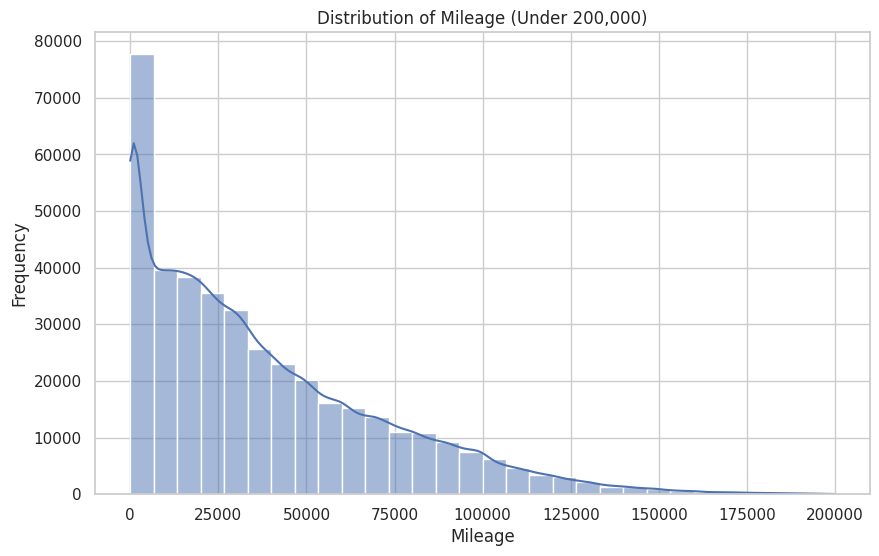

In [ ]:
# Create a subset where Mileage is under 200,000
mileage_subset = df[df['mileage'] < 200000]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(mileage_subset['mileage'], bins=30, kde=True)

plt.title('Distribution of Mileage (Under 200,000)')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

sample_size = 1000
mileage_sample = mileage_subset.sample(n=sample_size, random_state=42)

## **Standard Colour sample**

In [ ]:
standard_colour = df['standard_colour']
sc_sample=standard_colour.sample(n=1000, random_state=42)

## **Fuel Type sample**

In [ ]:
fuel_type = df['fuel_type']
ft_sample=fuel_type.sample(n=1000, random_state=42)

## **Vehicle_condition sampling**

In [ ]:
vehicle_condition = df['vehicle_condition']
vc_sample=vehicle_condition.sample(n=1000, random_state=42)

## **price_subset**: There are exrtreme outleirs in the price distribution so we need to create te subset of price by applying the condition.


1.   As we can see that the distribution graph of price is showing straight line which is showing our price is only distributed around 0 to 0.1 e7  
2.   we are going to create a subset of the price by applying the condition that it is noise or wrong value as the maximum price is 9999999.
3.  The IQR method is used to deal outliers and create a subset of price


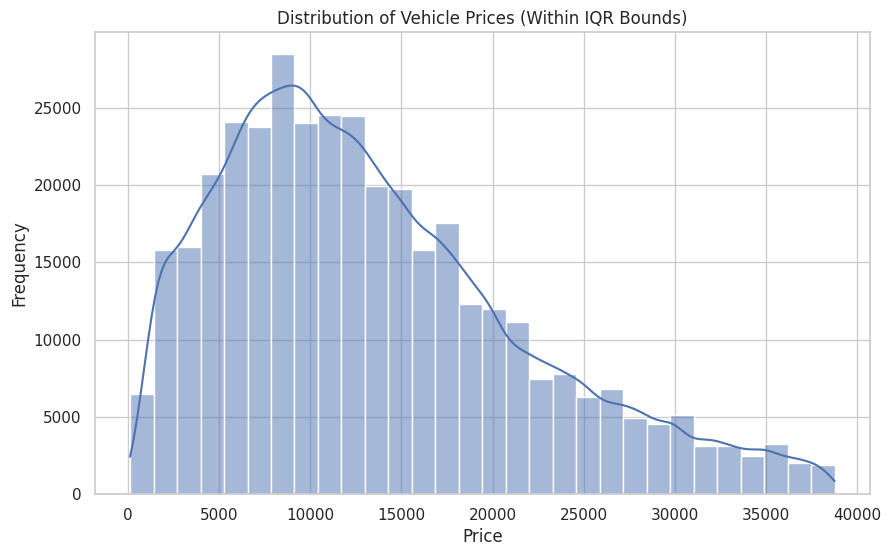

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

price_subset = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(price_subset['price'], bins=30, kde=True)

# Add titles and labels
plt.title('Distribution of Vehicle Prices (Within IQR Bounds)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

sample_size = 1000
price_sample = price_subset.sample(n=sample_size, random_state=42)

# **Year of Registration subset**: mostly the cars lies between the 1980 to 2021 and most of them in the zone of 2000 to 2021.

In [ ]:
year_of_registration_subset = df[(df['year_of_registration'] >= 1990) & (df['year_of_registration'] <= 2021)]

sample_size = 1000
yor_sample = year_of_registration_subset.sample(n=sample_size, random_state=42)

## **Age_of_car Subset**

In [ ]:
age_of_car= df['age_of_car']
aoc_sample=age_of_car.sample(n=1000, random_state=42)

## **mileage_category sample**

In [ ]:
mileage_category= df['Mileage_Category']
mc_sample=mileage_category.sample(n=1000, random_state=42)

### Displaying the distribution of the subset of year of registration

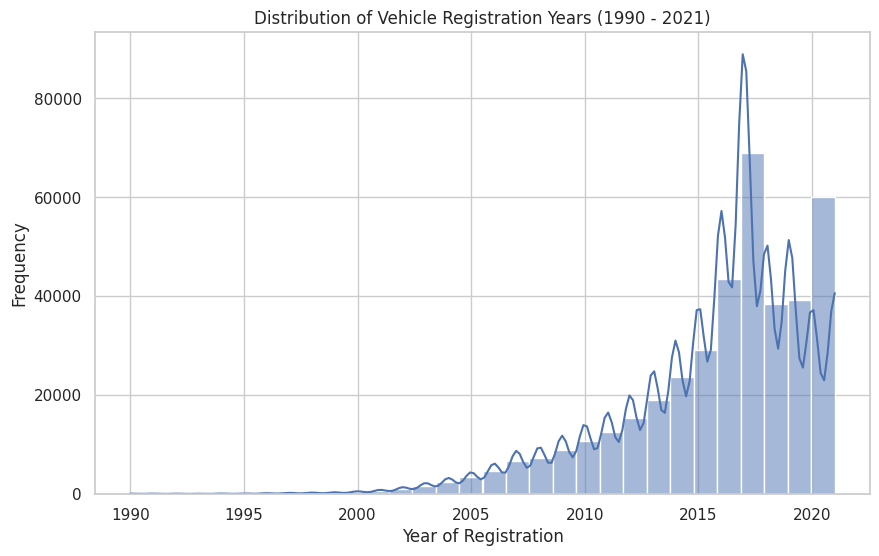

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(year_of_registration_subset['year_of_registration'], bins=30, kde=True)
plt.title('Distribution of Vehicle Registration Years (1990 - 2021)')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.show()

# **Standard_make_subset**
1. Only counting the 30 frequent models of the cars for the visualization purpose.

In [ ]:
make_counts = df['standard_make'].value_counts()
top_n_makers = make_counts.nlargest(30).index.tolist()  # Get top 30 makes

standard_make_subset = df[df['standard_make'].isin(top_n_makers)]
sample_size = 1000
smake_sample = standard_make_subset.sample(n=sample_size, random_state=42)

### Displaying the distribution of the subset

<ipython-input-52-ac33cf7e3a56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='standard_make', data=standard_make_subset, palette='viridis')


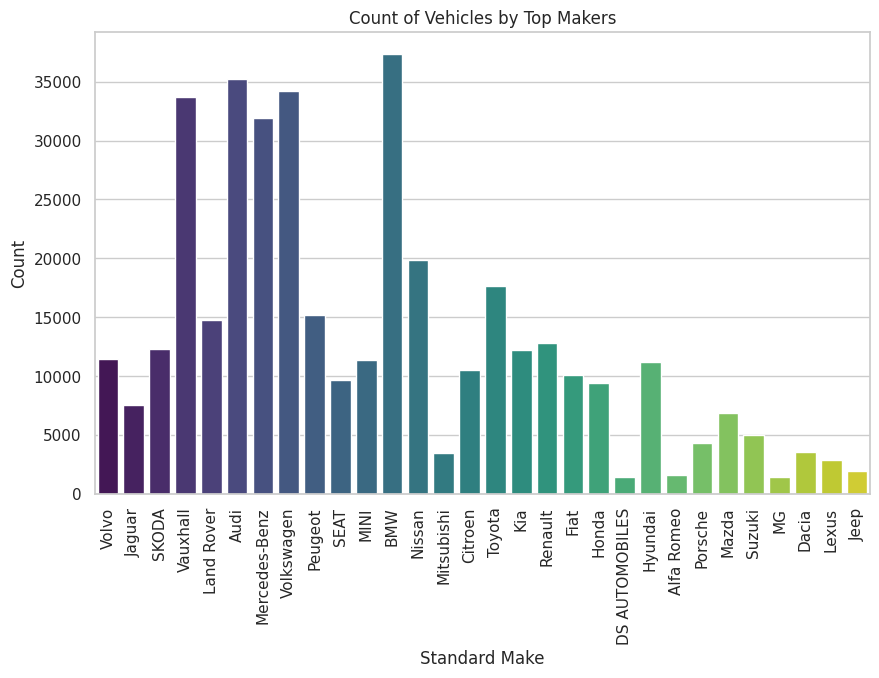

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='standard_make', data=standard_make_subset, palette='viridis')

plt.title('Count of Vehicles by Top Makers')
plt.xlabel('Standard Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Converting data type to categorical data type

In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 401684 entries, 0 to 402004
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   public_reference       401684 non-null  int64   
 1   mileage                401569 non-null  float64 
 2   reg_code               401638 non-null  category
 3   standard_colour        401684 non-null  category
 4   standard_make          401684 non-null  category
 5   standard_model         401684 non-null  category
 6   vehicle_condition      401684 non-null  category
 7   year_of_registration   401680 non-null  float64 
 8   price                  401684 non-null  int64   
 9   body_type              400906 non-null  category
 10  crossover_car_and_van  401684 non-null  bool    
 11  fuel_type              401091 non-null  category
 12  Mileage_Category       401684 non-null  category
 13  age_of_car             401680 non-null  float64 
dtypes: bool(1), category(8), 

# **3. Analysis of Associatioin and Group Differences**

## **3.1 Quantitative-Quantitative**

### Example 1: Price vs Mileage

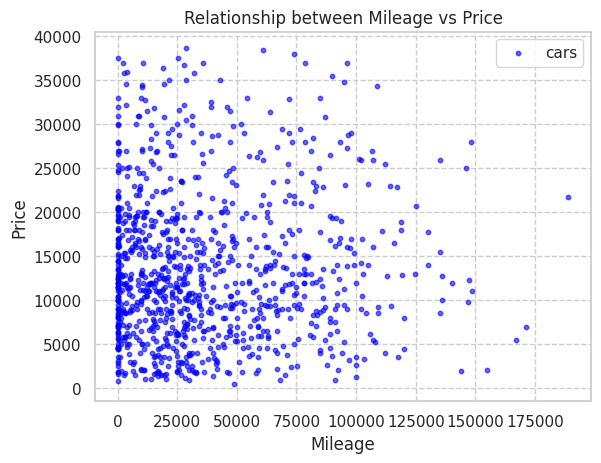

In [ ]:
plt.scatter(mileage_sample['mileage'], price_sample['price'], alpha=0.6, s=10, color='blue', label='cars')
plt.title('Relationship between Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

## **Conlusion:**

1.   there is negative relation between mileage and price. as the mileage increases, the price tends to decrease. Which shows the typical market trend.
2.   Most of the data point are clustered below 80,0000 miles and the price range of 25000 pounds indicating that the majority of the vehicles are newer or lower in usage.
3.   Some vehicles with mileage above than 125000 still show moderate prices indicates that it can be well maintained vehicles than retain value well.


### Example 2: Price vs Year of Registration

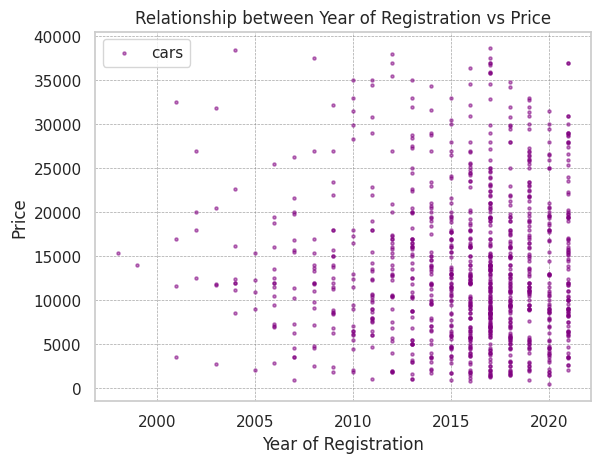

In [ ]:
plt.scatter(yor_sample['year_of_registration'], price_sample['price'], alpha=0.5, s=5, color='purple', label='cars')
plt.title('Relationship between Year of Registration vs Price')
plt.xlabel('Year of Registration')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, color='gray', alpha=0.7)
plt.show()

## **Conlusion:**

1.   There are higher prices for cars that are newly registered
2.   Older cars are few and are in lower range of price due to value decreases over time like the ones before 2005.
3.   A signifiacnt amount of data is clustered between the year 2010 to 2020 with price upto 25000 indicating most of the dataset is of modern vehicles.
4.  Some point below 2005 are of significant high amount which is outleir and can be significant as it might be the classic car.
5.  There is market saturation in between years 2010-2020 as there is overlap of datapoints.


## **3.2 Quantitative-Categorical**

### Example1: Price vs Vehicle Condition

<ipython-input-56-1e8bf4ba9666>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=price_subset, x='price', y='vehicle_condition', palette='viridis')


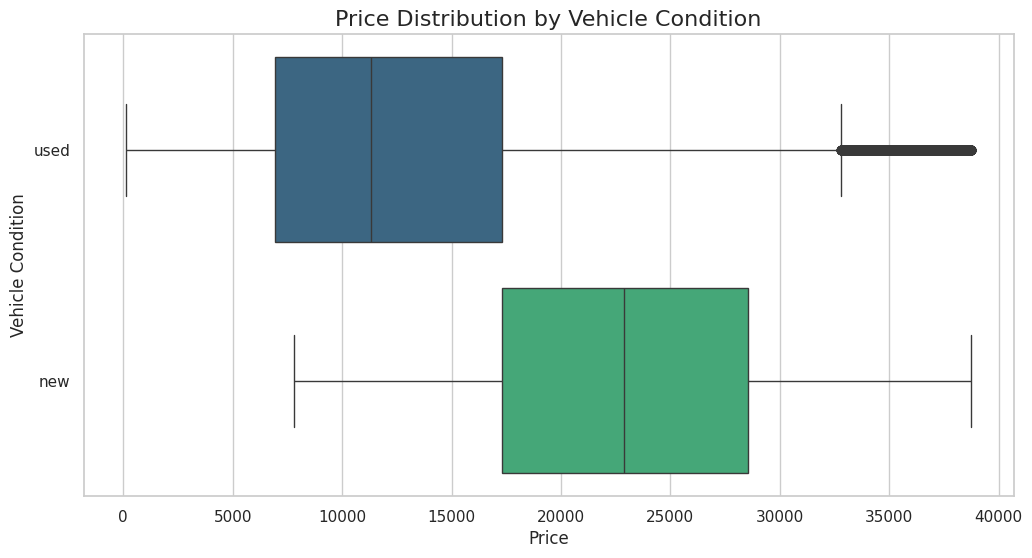

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=price_subset, x='price', y='vehicle_condition', palette='viridis')
plt.title('Price Distribution by Vehicle Condition', fontsize=16)
plt.ylabel('Vehicle Condition', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.show()

### **Conclusion:**


1.   The used cars mean value lies between the 12000 to 13000 and the whole data is distributed between the 7000 to 17000 of the price .The left bound and the right bound are not equal which shows the high variability in the price range of used cars.
2.   There are visible outleirs in the used car section which can be some classic cars or incorrect values which are in high price range.

1.   The new cars have median value around 23000 and the price data is mostly acccumulated around the price range of 17000 to 27000 . the left bound and right bound are equal which shows the consistent of the price range of vehicles
4.  There is no outleirs in the graph for new vehicles.




### Example2: Price vs Fuel Type

<ipython-input-57-58b7f5903578>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=price_subset, y='fuel_type', x='price', palette='viridis')


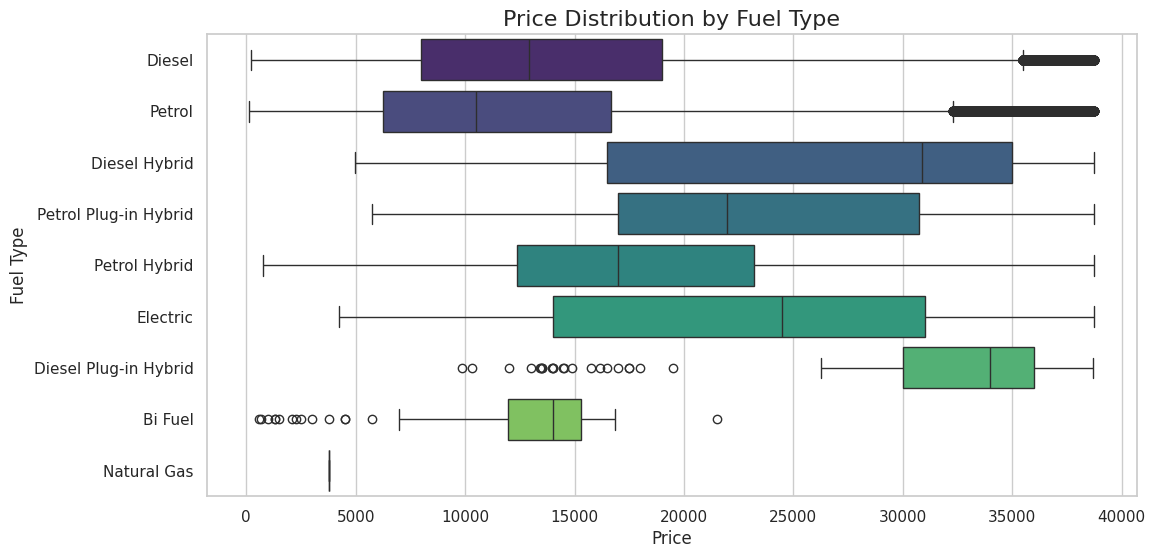

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=price_subset, y='fuel_type', x='price', palette='viridis')

# Add titles and labels
plt.title('Price Distribution by Fuel Type', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)

# Show the plot
plt.show()

### **Conclusion:**


1.   Diesel is the one with wide range of price and has outliers whihc might be incorrect value or shows the high end model does has diesel as fuel type.  
2.   petrol has same range but is mostly concentrated around 6000 to 17000 which shows the affordable price range.
3.   petrol hybird, petrol plug-in-hybrid and diesel hybrid median price is greater than petrol and diesel which might be because of its efficieny which increases its price as hybrid technology.  
5.   Electric fuel type has median value reaching almost 25000 which shows the higher cost of electric cars
6.   Diesel plug in hybrid is expensive than the other hybrid cars because of its premium nature and there are outleirs in it too.
7. Bifuel cars are in low range as compared to other which might be because of low awareness of bifuel which is less polluting.



## **3.3 Categorical-Categorical**

### Example 1: Stacked BArplot Mileage Category vs Fuel Type

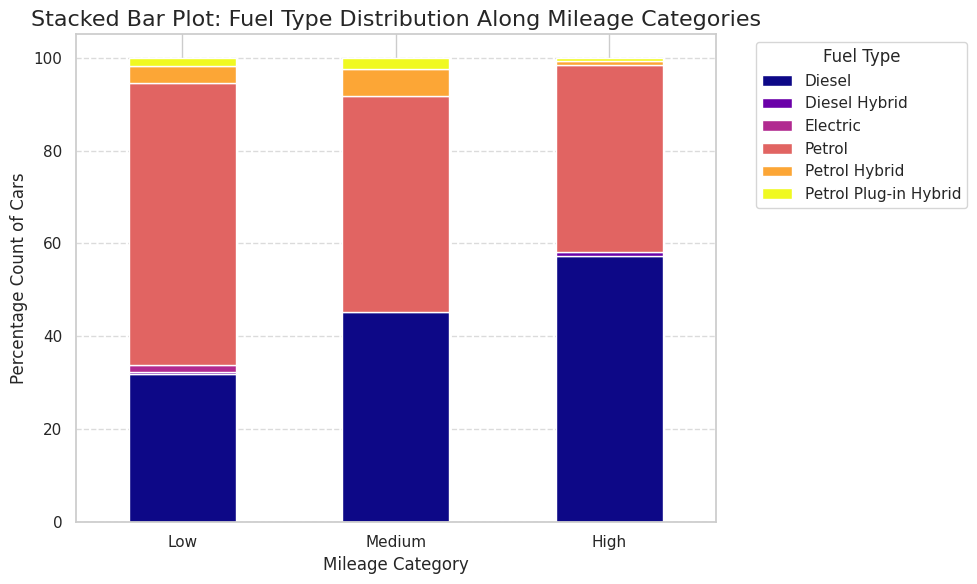

In [ ]:
category_order = pd.CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)
m_category_sample['Mileage_Category'] = m_category_sample['Mileage_Category'].astype(category_order)
ct_percentage = pd.crosstab(
    m_category_sample['Mileage_Category'],
    m_category_sample['fuel_type'],
    normalize='index'
) * 100  # Multiply by 100 to convert to percentages

ct_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')

plt.title('Stacked Bar Plot: Fuel Type Distribution Along Mileage Categories', fontsize=16)
plt.xlabel('Mileage Category', fontsize=12)
plt.ylabel('Percentage Count of Cars', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## **Conlusion:**

1.   The Low mileage cars are mostly dominant by petrol fuel type shown in orange color in legend which decreases as the the car mileage category increases as we can see from the graph.  The medium mileage cars contribute around 40 percent and in high mielage cars its low as compared to other medium and low mileage cars
2.   The diesel cars ash shown in plot by blue color while on the other hand show a reverse trend as high mileage cars are moslty diesel cars which may elaborate the significance of the point that for the long run the diesel cars are more preffered than the petrol ones . The low mileage cars have low contribution compared to petrol and but in the medium category they are almost the same.

1.   The petrol hybrid and petrol plug in hybrid are low in proportion compared to petrol and diesel in low and medium category which shows that they might be expensive to buy or people are not aware of the benfits of these fuel types.
2.   there is very small amount of electric cars in





### Example 2: Heatmap Plot

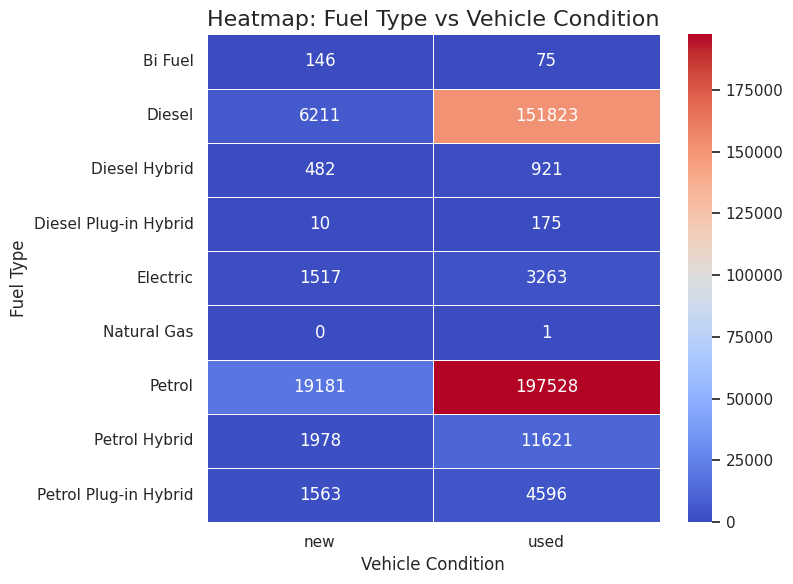

In [ ]:
heatmap_data = pd.crosstab(df['fuel_type'], df['vehicle_condition'])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data,annot=True, fmt='d', cmap='coolwarm', linewidths=0.5,linecolor='white')
plt.title('Heatmap: Fuel Type vs Vehicle Condition', fontsize=16)
plt.xlabel('Vehicle Condition', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)
plt.tight_layout()
plt.show()

### **Conclusion:**


1.   The clear dominance of petrol in used and old cars can be seen in the plot .This shows the preference of petrol cars in the dataset
2.   The dominance of used vehicles can be seen in the market overnew price.
3.  Diesel is the second most prefereable than the others.
4.  The environment friendly fuel type cars like electric,  bifuel, plug in petrol hybrid etc are getting accpeted and is increasing in the dataset



# **Machine Learning Assignment Code**

# Onehot Encoding

In [ ]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,46
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,4
price,0
body_type,778


As all values are less than one percent er can remove these missing value for the model to perform better


In [ ]:
df_cleaned= df.dropna()

In [ ]:
en_data= df_cleaned[['Mileage_Category', 'vehicle_condition', 'body_type', 'fuel_type']]
pd.get_dummies(en_data)

,Mileage_Category_High,Mileage_Category_Low,Mileage_Category_Medium,vehicle_condition_new,vehicle_condition_used,body_type_Camper,body_type_Car Derived Van,body_type_Chassis Cab,body_type_Combi Van,body_type_Convertible,...,body_type_Window Van,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Natural Gas,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
0,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
402001,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
402002,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
402003,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# **Important Libraries to Import**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# **KNN model training on subsets**

In [ ]:
# Define columns
categorical_subset = ['age_of_car','standard_make', 'fuel_type', 'vehicle_condition', 'standard_colour']
numerical_subset = ['mileage']
target_column = 'price'
sample_size = 10000
random_state = 15
# Function to sample data
def sample_data(df_cleaned, columns, target, sample_size, random_state):
    sampled_df = df_cleaned.sample(n=sample_size, random_state=random_state, replace=True)
    return sampled_df[columns + [target]]
# Function to handle outliers using the IQR method
def remove_outliers(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
# Sample the data
sampled_data = sample_data(df_cleaned, categorical_subset + numerical_subset, target_column, sample_size, random_state)
# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
sampled_data[categorical_subset + numerical_subset] = imputer.fit_transform(sampled_data[categorical_subset + numerical_subset])
# Remove outliers in numerical features
for col in numerical_subset:
    sampled_data = remove_outliers(sampled_data, col)
# Separate features and target
X = sampled_data[categorical_subset + numerical_subset]
y = sampled_data[target_column]
# Preprocessing: One-Hot Encoding for categorical variables and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_subset),
        ("cat", OneHotEncoder(drop="first"), categorical_subset),
    ]
)
# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=random_state)
# Train the KNN model with a fixed value for n_neighbors
knn_model = KNeighborsRegressor(n_neighbors=31)  # You can adjust the value of n_neighbors
knn_model.fit(X_train, y_train)
# Predict on the test set
y_pred = knn_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Squared Error (MSE): 277385098.56
R-Squared: 0.31


# **Knn model:Hyper parameters Tuning **

In [ ]:
# Define the KNN model
knn_model = KNeighborsRegressor()
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': range(1, 51),  # Testing n_neighbors from 1 to 50
}
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)
# Get the best model and parameters
best_knn_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R-Squared (Cross-Validation): {grid_search.best_score_:.2f}")
# Predict on the test set using the best model
y_pred = best_knn_model.predict(X_test)
# Evaluate the tuned model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared on Test Set: {r2:.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_neighbors': 6}
Best R-Squared (Cross-Validation): 0.41
Mean Squared Error (MSE): 251705519.70
R-Squared on Test Set: 0.37


##**Linear Regression model**

In [ ]:
# Define columns
categorical_subset = ['age_of_car', 'standard_make', 'fuel_type', 'vehicle_condition', 'standard_colour']
numerical_subset = ['mileage']
target_column = 'price'
sample_size = 10000
random_state = 18
# Function to sample data
def sample_data(df_cleaned, columns, target, sample_size, random_state):
    sampled_df = df_cleaned.sample(n=sample_size, random_state=random_state, replace=True)
    return sampled_df[columns + [target]]
# Function to handle outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Sample the data
sampled_data = sample_data(df_cleaned, categorical_subset + numerical_subset, target_column, sample_size, random_state)
# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
sampled_data[categorical_subset + numerical_subset] = imputer.fit_transform(sampled_data[categorical_subset + numerical_subset])
# Remove outliers in numerical features
for col in numerical_subset:
    sampled_data = remove_outliers(sampled_data, col)
# Separate features and target
X = sampled_data[categorical_subset + numerical_subset]
y = sampled_data[target_column]
# Preprocessing: One-Hot Encoding for categorical variables and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_subset),
        ("cat", OneHotEncoder(drop="first"), categorical_subset),
    ]
)
# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=random_state)
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Predict on the test set
y_pred = linear_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Squared Error (MSE): 224421652.63
R-Squared: 0.64


# **Decision Tree Model**

In [ ]:
# Define columns
categorical_subset = ['age_of_car', 'standard_make', 'fuel_type', 'vehicle_condition', 'standard_colour']
numerical_subset = ['mileage']
target_column = 'price'
sample_size = 10000
random_state = 18
# Function to sample data
def sample_data(df_cleaned, columns, target, sample_size, random_state):
    sampled_df = df_cleaned.sample(n=sample_size, random_state=random_state, replace=True)
    return sampled_df[columns + [target]]
# Function to handle outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Sample the data
sampled_data = sample_data(df_cleaned, categorical_subset + numerical_subset, target_column, sample_size, random_state)
# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
sampled_data[categorical_subset + numerical_subset] = imputer.fit_transform(sampled_data[categorical_subset + numerical_subset])
# Remove outliers in numerical features
for col in numerical_subset:
    sampled_data = remove_outliers(sampled_data, col)
# Separate features and target
X = sampled_data[categorical_subset + numerical_subset]
y = sampled_data[target_column]
# Preprocessing: One-Hot Encoding for categorical variables and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_subset),
        ("cat", OneHotEncoder(drop="first"), categorical_subset),
    ]
)
# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=random_state)
# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=random_state, max_depth=5)  # You can tune max_depth
dt_model.fit(X_train, y_train)
# Predict on the test set
y_pred = dt_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Squared Error (MSE): 233557620.27
R-Squared: 0.63


**Decision Tree - Hyperparameter Tuning**

In [ ]:
# Define the model
dt_model = DecisionTreeRegressor(random_state=18)
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)
# Display best parameters and corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R-Squared (Cross-Validation): {grid_search.best_score_:.2f}")
# Train the model with best parameters
best_dt_model = grid_search.best_estimator_
# Predict on the test set
y_pred = best_dt_model.predict(X_test)
# Evaluate the tuned model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared on Test Set: {r2:.2f}")

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best R-Squared (Cross-Validation): 0.49
Mean Squared Error (MSE): 198713148.65
R-Squared on Test Set: 0.68


# **Heat map to show correlation**

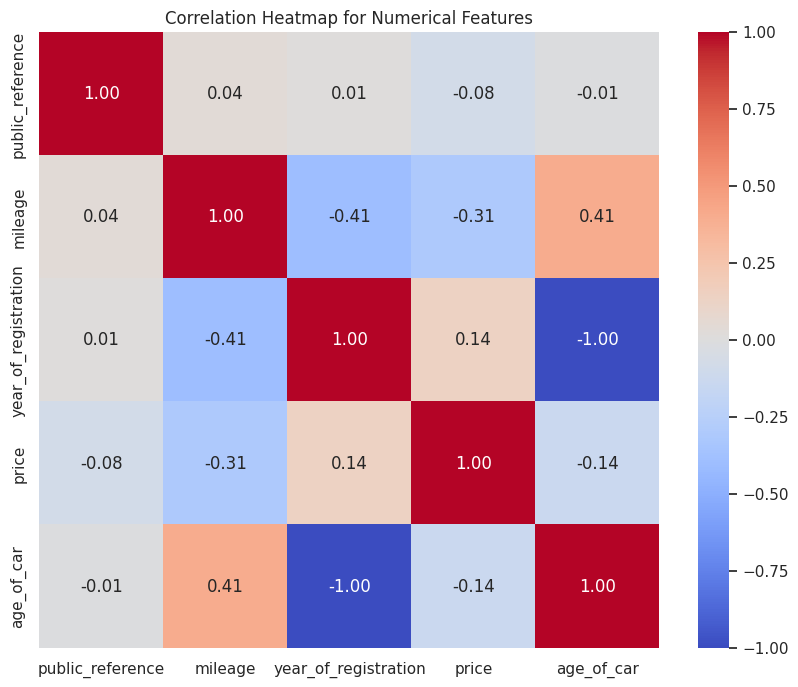

In [ ]:

numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

In [ ]:
from scipy.stats import f_oneway

groups = [df_cleaned[df_cleaned['fuel_type'] == category]['price'] for category in df_cleaned['fuel_type'].unique()]

anova_result = f_oneway(*groups)
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("There is a statistically significant relationship between the fuel type and price.")
else:
    print("No significant relationship found between the fuel type and numerical price.")

ANOVA F-statistic: 1005.6693043038895
ANOVA p-value: 0.0
There is a statistically significant relationship between the fuel type and price.


In [ ]:
from scipy.stats import f_oneway

groups = [df_cleaned[df_cleaned['vehicle_condition'] == category]['price'] for category in df_cleaned['vehicle_condition'].unique()]

anova_result = f_oneway(*groups)
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("There is a statistically significant relationship between the vehicle_condition and price.")
else:
    print("No significant relationship found between the vehicle and price.")

ANOVA F-statistic: 15304.60456907842
ANOVA p-value: 0.0
There is a statistically significant relationship between the vehicle_condition and price.


# **Important features by linear Regression model**

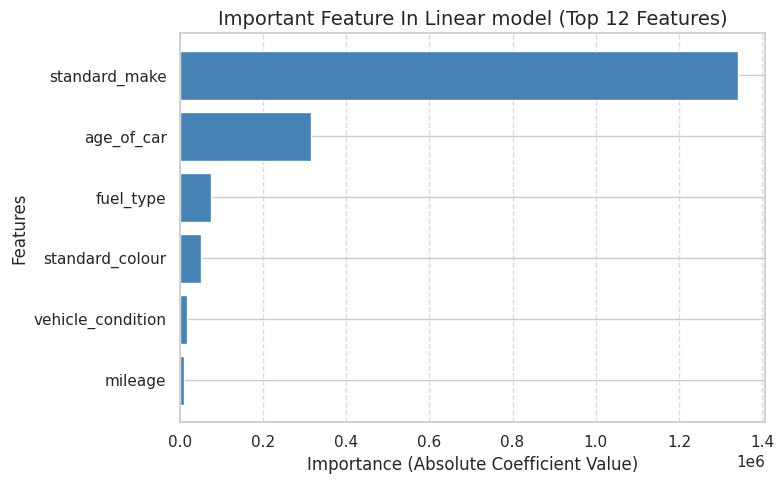


Top 12 Simplified Feature Importance:
  Simplified Feature    Importance
4      standard_make  1.340849e+06
0         age_of_car  3.156190e+05
1          fuel_type  7.428720e+04
3    standard_colour  5.068982e+04
5  vehicle_condition  1.853442e+04
2            mileage  1.010478e+04


In [ ]:
# Extract the original feature names from the OneHotEncoder
original_feature_names = numerical_subset + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_subset))

# Combine the original feature names with their importance
importance_df = pd.DataFrame({
    "Feature": original_feature_names,
    "Importance": abs(linear_model.coef_)  # Use absolute coefficients for feature importance
})

# Define a mapping function to revert one-hot encoding back to original categories
def group_one_hot_encoded_features(feature):
    for col in categorical_subset:
        if col in feature:  # Match the original category
            return col
    if feature in numerical_subset:
        return feature  # Keep numerical features as they are
    return feature  # Default to the original name if no match

# Apply the grouping to revert to original categories
importance_df["Simplified Feature"] = importance_df["Feature"].apply(group_one_hot_encoded_features)

# Aggregate the importance values by simplified categories
aggregated_importance = (
    importance_df.groupby("Simplified Feature")["Importance"]
    .sum()
    .reset_index()
    .sort_values(by="Importance", ascending=False)
)

# Select the top 12 features
aggregated_importance = aggregated_importance.head(12)

# Plot the aggregated feature importance
plt.figure(figsize=(8, 5))
plt.barh(aggregated_importance["Simplified Feature"], aggregated_importance["Importance"], color="steelblue")
plt.title("Important Feature In Linear model (Top 12 Features)", fontsize=14)
plt.xlabel("Importance (Absolute Coefficient Value)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.gca().invert_yaxis()  # Most important feature at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Print the simplified importance table
print("\nTop 12 Simplified Feature Importance:")
print(aggregated_importance)


## **Important feature in Decision tree model**

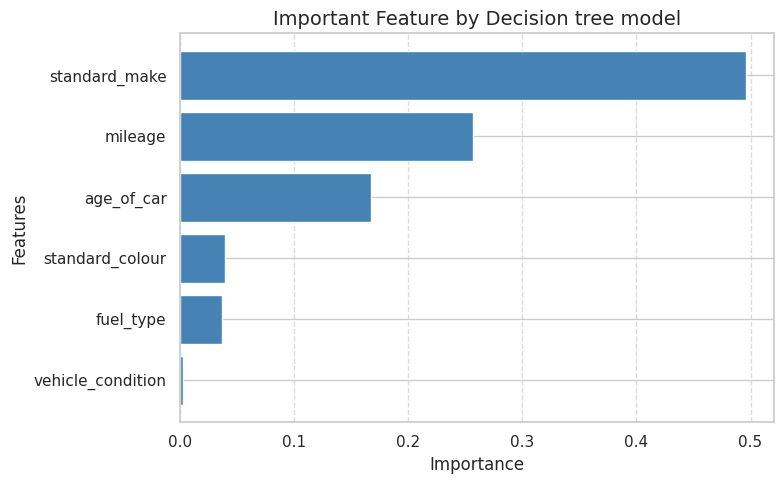


Top 12 Simplified Feature Importance:
  Simplified Feature  Importance
4      standard_make    0.495793
2            mileage    0.256820
0         age_of_car    0.167716
3    standard_colour    0.039944
1          fuel_type    0.037229
5  vehicle_condition    0.002498


In [ ]:
dt_model.fit(X_train, y_train)
# Extract feature names and importance
feature_names = numerical_subset + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_subset))
feature_importances = dt_model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

# Simplify feature names to group one-hot encoded features into original categories
importance_df["Simplified Feature"] = importance_df["Feature"].apply(
    lambda feature: next((col for col in categorical_subset if col in feature), feature)
)

# Aggregate importance by simplified feature categories
aggregated_importance = (
    importance_df.groupby("Simplified Feature")["Importance"]
    .sum()
    .reset_index()
    .sort_values(by="Importance", ascending=False)
)

# Keep the top 12 features
aggregated_importance = aggregated_importance.head(12)

# Plot the simplified feature importance
plt.figure(figsize=(8, 5))
plt.barh(aggregated_importance["Simplified Feature"], aggregated_importance["Importance"], color="steelblue")
plt.title("Important Feature by Decision tree model", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.gca().invert_yaxis()  # Most important feature at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Print the simplified importance table
print("\nTop 12 Simplified Feature Importance:")
print(aggregated_importance)


# **4.3(a) Fine grained Analysis of the model. **

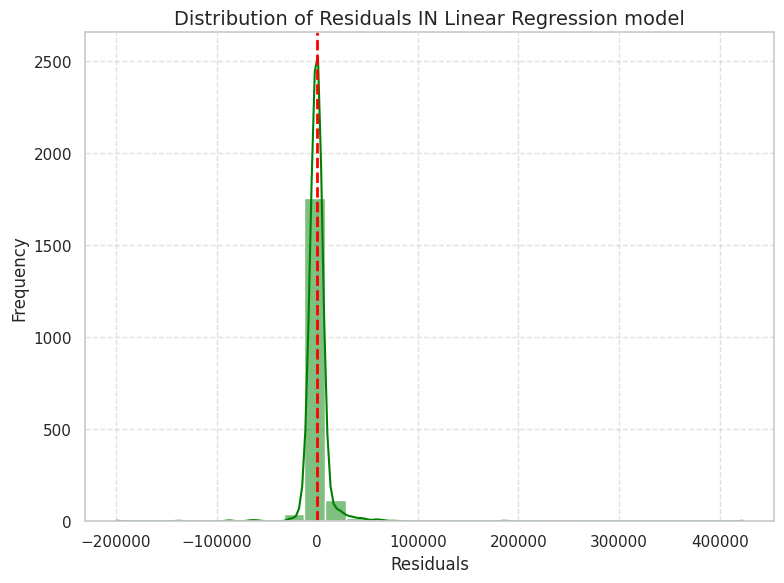


Residual Analysis:
Mean of residuals: 49.68
Standard deviation of residuals: 14980.63


In [ ]:

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Histogram plot of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="green")
plt.axvline(0, color="red", linestyle="--", linewidth=2)  # Vertical line at 0
plt.title("Distribution of Residuals IN Linear Regression model", fontsize=14)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Print key residual statistics
print("\nResidual Analysis:")
print(f"Mean of residuals: {np.mean(residuals):.2f}")
print(f"Standard deviation of residuals: {np.std(residuals):.2f}")


# ** 4.3(b) Fine grained Analysis of the model.**

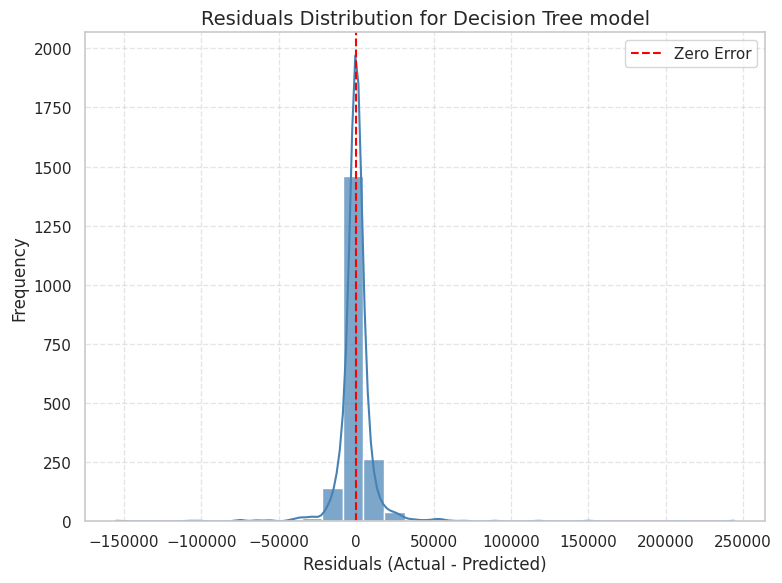


Residuals Analysis:
Mean Residual: 40.88
Median Residual: 0.00
Residual Standard Deviation: 12919.29


In [ ]:

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot of Residuals Distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="steelblue", bins=30, alpha=0.7)
plt.axvline(0, color="red", linestyle="--", label="Zero Error")
plt.title("Residuals Distribution for Decision Tree model", fontsize=14)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()

# Print basic statistics of residuals
print("\nResiduals Analysis:")
print(f"Mean Residual: {np.mean(residuals):.2f}")
print(f"Median Residual: {np.median(residuals):.2f}")
print(f"Residual Standard Deviation: {np.std(residuals):.2f}")


#**1️⃣Part I (50%)**

## **2. 🧩Automated Feature Selection**

### Importing Librarires and packages

In [ ]:
import sklearn
sklearn.set_config(transform_output="pandas")

%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.metrics import mean_absolute_error

import shap
shap.initjs()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_subset),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_subset),
    ]
)

X_preprocessed = preprocessor.fit_transform(X)
y = sampled_data[target_column]

print(type(X_preprocessed))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_regression

def rank_feature_importance(X_preprocessed, y, preprocessor, categorical_subset, numerical_subset):
    """
    Returns ranked features with importance scores, with proper type classification.

    Args:
        X_preprocessed: Output from ColumnTransformer
        y: Target variable
        preprocessor: Fitted ColumnTransformer
        categorical_subset: Original categorical columns
        numerical_subset: Original numerical columns

    Returns:
        DataFrame with columns: ['feature', 'score', 'type']
    """
    # Get feature names after one-hot encoding
    cat_encoder = preprocessor.named_transformers_['cat']
    cat_features = cat_encoder.get_feature_names_out(categorical_subset)
    all_feature_names = numerical_subset + list(cat_features)

    # Calculate ANOVA F-scores
    f_scores, _ = f_regression(X_preprocessed, y)

    # Create mapping of original features to their components
    feature_info = []

    # Handle numerical features first
    for num_feature in numerical_subset:
        idx = all_feature_names.index(num_feature)
        feature_info.append({
            'original_name': num_feature,
            'processed_name': num_feature,
            'score': f_scores[idx],
            'type': 'numerical'
        })

    # Handle categorical features
    for cat_feature in categorical_subset:
        # Find all one-hot encoded columns for this categorical
        components = [name for name in cat_features if name.startswith(cat_feature)]
        if not components:
            continue

        # Get max score across all one-hot encoded columns
        component_scores = [f_scores[all_feature_names.index(name)] for name in components]
        max_score = max(component_scores)

        feature_info.append({
            'original_name': cat_feature,
            'processed_name': f"{cat_feature}_[aggregated]",
            'score': max_score,
            'type': 'categorical'
        })

    # Create sorted DataFrame
    importance_df = (pd.DataFrame(feature_info)
                   .sort_values('score', ascending=False)
                   .reset_index(drop=True)
                   .rename(columns={'original_name': 'feature'}))

    return importance_df[['feature', 'score', 'type']]

# Usage
importance_df = rank_feature_importance(
    X_preprocessed=X_preprocessed,
    y=y,
    preprocessor=preprocessor,
    categorical_subset=categorical_subset,
    numerical_subset=numerical_subset
)

# Format output
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\nRanked Feature Importance:")
print(importance_df.to_string(index=False))


Ranked Feature Importance:
          feature   score        type
    standard_make 1667.97 categorical
          mileage 1362.55   numerical
vehicle_condition  503.22 categorical
       age_of_car  345.45 categorical
        fuel_type  120.85 categorical
  standard_colour   30.40 categorical


##Recursive Feature Elimination (RFE)

In [ ]:
def rfe_feature_selection(X, y, preprocessor, categorical_subset, numerical_subset, n_features_to_select=5):
    """
    Fixed RFE implementation with proper coefficient handling and categorical aggregation.
    """
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('rfe', RFE(
            estimator=LinearRegression(),
            n_features_to_select=n_features_to_select,
            step=1
        ))
    ])

    # Fit RFE
    pipeline.fit(X, y)

    # Get feature names
    cat_encoder = preprocessor.named_transformers_['cat']
    cat_features = cat_encoder.get_feature_names_out(categorical_subset)
    all_features = numerical_subset + list(cat_features)

    # Create results DataFrame
    rfe = pipeline.named_steps['rfe']
    rfe_results = pd.DataFrame({
        'engineered_feature': all_features,
        'ranking': rfe.ranking_,
        'support': rfe.support_
    })

    # Map to original features
    def get_original_feature(feature_name):
        if feature_name in numerical_subset:
            return feature_name
        for cat in categorical_subset:
            if feature_name.startswith(cat):
                return cat
        return feature_name

    rfe_results['original_feature'] = rfe_results['engineered_feature'].apply(get_original_feature)

    # Get coefficients only for selected features
    if hasattr(rfe.estimator_, 'coef_'):
        selected_mask = rfe.support_
        coefs = np.full(len(all_features), np.nan)
        coefs[selected_mask] = rfe.estimator_.coef_
        rfe_results['coefficient'] = coefs

    # Aggregate results by original features
    agg_funcs = {'ranking': 'min', 'support': 'any'}
    if 'coefficient' in rfe_results.columns:
        agg_funcs['coefficient'] = lambda x: x.abs().mean() if x.notna().any() else np.nan

    ranking_df = rfe_results.groupby('original_feature').agg(agg_funcs).sort_values('ranking').reset_index()

    return {
        'selected_features': ranking_df[ranking_df['support']]['original_feature'].tolist(),
        'ranking_df': ranking_df,
        'full_results': rfe_results
    }

In [ ]:
rfe_results = rfe_feature_selection(
    X=sampled_data[categorical_subset + numerical_subset],
    y=sampled_data[target_column],
    preprocessor=ColumnTransformer([
        ('num', MinMaxScaler(), numerical_subset),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_subset)
    ]),
    categorical_subset=categorical_subset,
    numerical_subset=numerical_subset,
    n_features_to_select=5
)

print("Selected Features:", rfe_results['selected_features'])
print("\nFeature Rankings:")
print(rfe_results['ranking_df'].to_string(index=False))

Selected Features: ['standard_make']

Feature Rankings:
 original_feature  ranking  support  coefficient
    standard_make        1     True    166442.83
        fuel_type        7    False          NaN
          mileage        9    False          NaN
       age_of_car       10    False          NaN
vehicle_condition       24    False          NaN
  standard_colour       49    False          NaN
